In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Reading the data :

In [38]:
df = pd.read_excel("IPEDS_data.xlsx")
df.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


## 2.  Data Cleaning:

In [9]:
df.shape

(1534, 145)

In [24]:
df.isna().sum().sort_values(ascending = False)

Endowment assets (year end) per FTE enrollment (GASB)      1018
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
Percent of first-time undergraduates - out-of-state         623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64

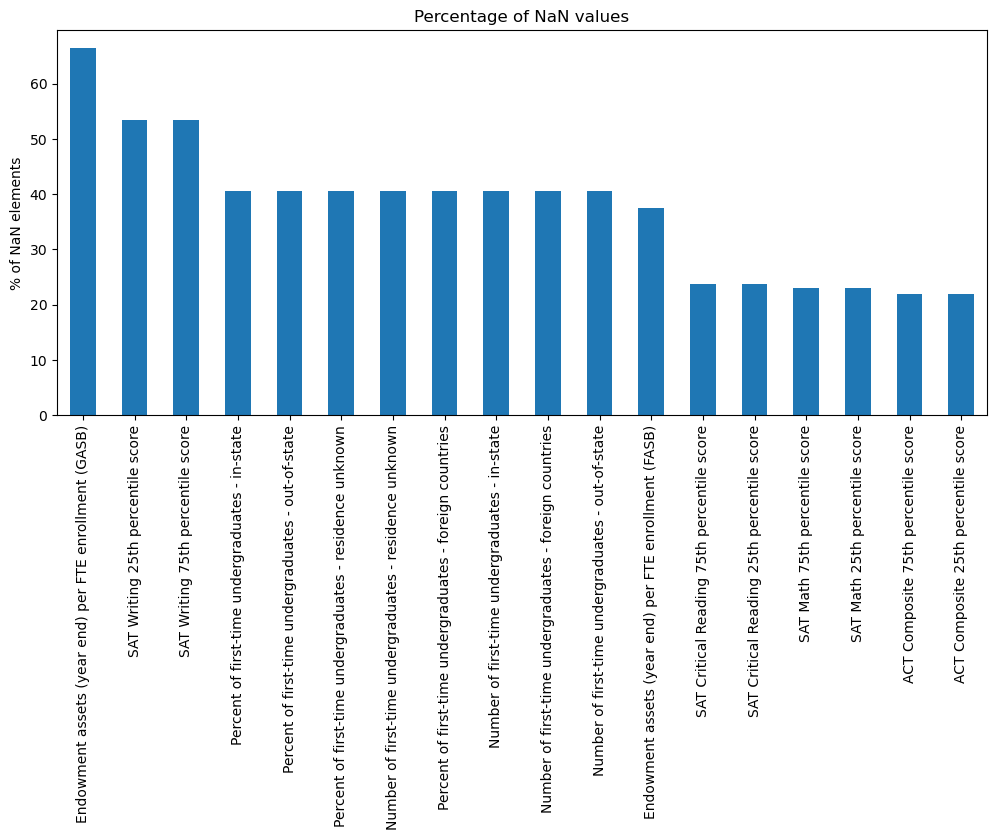

In [28]:
perc_nan = df.isna().sum()/len(df)*100
ax = perc_nan[perc_nan>20].sort_values(ascending = False).plot.bar(title='Percentage of NaN values',figsize=(12,5))
ax.set_ylabel('% of NaN elements');

All columns >20% NaN values will be dropped, because it cannot be used to determine any information from the data.

In [43]:
# getting all columns to be removed
to_be_dropped = df.isna().sum()[df.isna().sum()>=(0.2*len(df))].index.values
df.drop(to_be_dropped, axis = 1, inplace = True)
df.shape


(1534, 127)

In [44]:
interesting_columns=['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
       "Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total  enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',
       ]

In [45]:
df = df[interesting_columns]

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 29 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Name                                                            1534 non-null   object 
 1   year                                                            1534 non-null   int64  
 2   Highest degree offered                                          1534 non-null   object 
 3   Offers Bachelor's degree                                        1532 non-null   object 
 4   Offers Master's degree                                          1532 non-null   object 
 5   Offers Doctor's degree - research/scholarship                   1532 non-null   object 
 6   Offers Doctor's degree - professional practice                  1532 non-null   object 
 7   Applicants total                                   

In [48]:
df[df['Total  enrollment'].isna()]

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
257,University of North Georgia,2013,Doctor's degree - professional practice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,Texas A & M University-Galveston,2013,Doctor's degree - research/scholarship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.drop([257,1308],axis=0,inplace = True)

In [50]:
df.describe()

,year,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Total enrollment,Full-time enrollment,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
count,1532.0,1377.000000,1377.000000,1377.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1532.000000,...,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1522.000000,1269.000000,1476.000000,1476.000000,1476.000000
mean,2013.0,6391.193174,3554.880174,1043.046478,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5371.494125,...,5532.885117,1537.229112,4507.738903,1025.146214,57.911227,57.169514,63.109535,37.450542,49.788618,53.189024
std,0.0,8787.469171,4309.457606,1285.165519,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7474.494963,...,7242.649546,2765.197979,6042.192662,2121.495422,11.784477,11.886220,14.147092,21.949856,20.256726,19.102511
min,2013.0,0.000000,0.000000,0.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,1488.000000,950.000000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1199.000000,...,1328.000000,46.750000,1089.500000,87.000000,52.000000,52.000000,55.000000,20.000000,36.000000,40.000000
50%,2013.0,3350.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2328.000000,...,2487.500000,471.000000,2066.000000,320.500000,58.000000,57.000000,64.000000,34.000000,49.000000,52.500000
75%,2013.0,7016.000000,4203.000000,1246.000000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6080.750000,...,6394.000000,1737.000000,5207.500000,1082.250000,63.000000,62.000000,72.000000,52.250000,63.000000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,...,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [54]:
total_zero = df[df.loc[:]==0].count().sum()
total_zero

395

replace those entries with NaN values.

In [57]:
df.replace(0,np.nan,inplace=True)
# checking again
total_zero = df[df.loc[:]==0].count().sum()
total_zero

0

 formatting the column names for easy access

In [58]:
df.columns

Index(['Name', 'year', 'Highest degree offered', 'Offers Bachelor's degree',
       'Offers Master's degree',
       'Offers Doctor's degree - research/scholarship',
       'Offers Doctor's degree - professional practice', 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total  enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 yea

In [59]:
# Replacing extra spaces and chars
col = []
for ele in df.columns:
    for char in [" - ", "-","  ","/"," "]:
        if char in ele:
            ele = ele.replace(char,"_")
    col.append(ele)
# Removing special characters
clean_col = []
for ele in col:
    ele = ele.casefold()
    for char in [",", "'","-"]:
        if char in ele:
            ele = ele.replace(char,"")
    clean_col.append(ele)
df.columns = clean_col

In [60]:
# state_abbreviation can be replaced by 'state' for ease
df.rename(columns={'state_abbreviation':'state'}, inplace = True)

In [61]:
df.columns

Index(['name', 'year', 'highest_degree_offered', 'offers_bachelors_degree',
       'offers_masters_degree', 'offers_doctors_degree_research_scholarship',
       'offers_doctors_degree_professional_practice', 'applicants_total',
       'admissions_total', 'enrolled_total', 'estimated_enrollment_total',
       'tuition_and_fees_2013_14',
       'total_price_for_in_state_students_living_on_campus_2013_14',
       'total_price_for_out_of_state_students_living_on_campus_2013_14',
       'state', 'control_of_institution', 'total_enrollment',
       'full_time_enrollment', 'part_time_enrollment',
       'undergraduate_enrollment', 'graduate_enrollment',
       'full_time_undergraduate_enrollment',
       'part_time_undergraduate_enrollment',
       'percent_of_total_enrollment_that_are_women',
       'percent_of_undergraduate_enrollment_that_are_women',
       'percent_of_graduate_enrollment_that_are_women',
       'graduation_rate_bachelor_degree_within_4_years_total',
       'graduation_rat

## 3. EDA and Visualization

In [62]:
df.describe()

,year,applicants_total,admissions_total,enrolled_total,estimated_enrollment_total,tuition_and_fees_2013_14,total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,total_enrollment,full_time_enrollment,...,undergraduate_enrollment,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total
count,1532.0,1376.000000,1376.000000,1376.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1530.000000,...,1522.000000,1269.000000,1519.000000,1495.000000,1529.000000,1518.000000,1268.000000,1457.000000,1468.000000,1469.000000
mean,2013.0,6395.837936,3557.463663,1043.804506,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5378.515686,...,5569.237845,1855.819543,4546.317314,1050.517726,58.024853,57.320158,63.159306,37.938916,50.059946,53.442478
std,0.0,8788.972944,4309.957540,1285.324785,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7476.855128,...,7252.465825,2939.482145,6053.531083,2141.386454,11.512998,11.533174,14.041089,21.668924,19.974502,18.790730
min,2013.0,4.000000,4.000000,2.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,1.000000,...,11.000000,1.000000,1.000000,2.000000,3.000000,8.000000,9.000000,1.000000,2.000000,2.000000
25%,2013.0,1491.750000,951.500000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1200.750000,...,1347.000000,216.000000,1119.500000,98.500000,52.000000,52.000000,55.000000,21.000000,36.000000,41.000000
50%,2013.0,3360.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2331.500000,...,2516.500000,728.000000,2087.000000,336.000000,58.000000,57.000000,64.000000,34.000000,49.000000,53.000000
75%,2013.0,7020.500000,4207.500000,1246.500000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6094.250000,...,6443.000000,2180.000000,5251.500000,1101.500000,63.000000,62.000000,72.000000,53.000000,63.250000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,...,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


which universities received the highest number of applications.

In [72]:
hhigh_app = df[['name','applicants_total']].sort_values("applicants_total",ascending = False).head(20)
high_app

,Name,Applicants total
84,University of California-Los Angeles,72676.0
81,University of California-Berkeley,61717.0
86,University of California-San Diego,60832.0
841,New York University,57845.0
83,University of California-Irvine,56515.0
87,University of California-Santa Barbara,55258.0
77,California State University-Long Beach,55019.0
863,St John's University-New York,51634.0
126,San Diego State University,51163.0
82,University of California-Davis,49820.0


Text(0.5, 0, 'Number of applications')

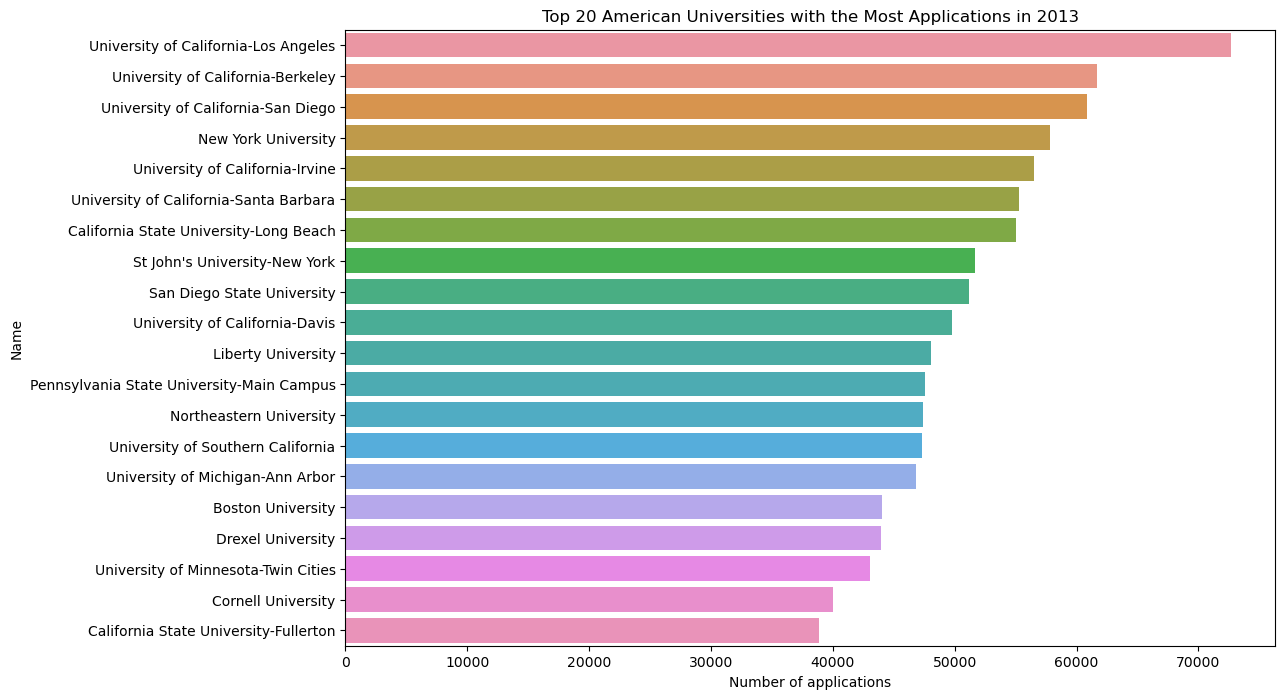

In [73]:
plt.figure(figsize=(12,8))
sns.barplot(data =high_app ,x="Applicants total",y='Name')
plt.title('Top 20 American Universities with the Most Applications in 2013')
plt.xlabel('Number of applications')

To find out  if the universities with the most applications are the preferred ones, let's find some relationships with the number of admissions and enrollments.

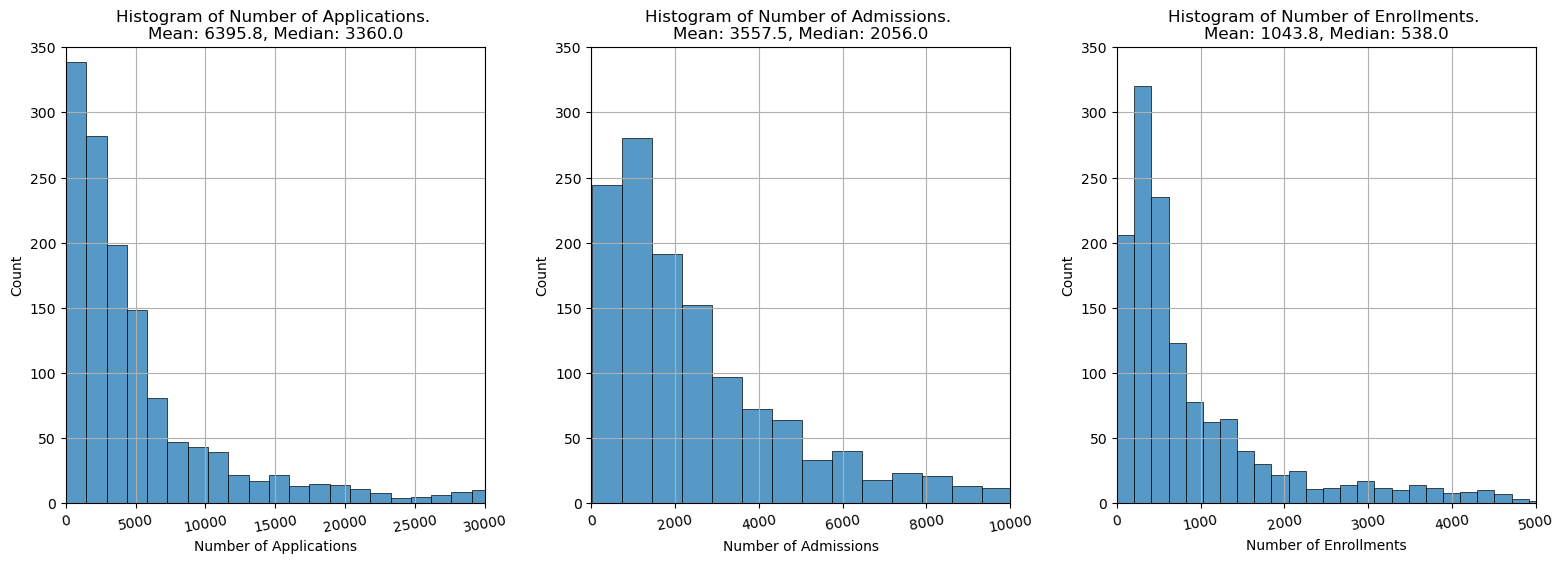

In [75]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.histplot(df.applicants_total,bins=50)
plt.title(f'''Histogram of Number of Applications. 
Mean: {df.applicants_total.mean():.1f}, Median: {df.applicants_total.median():.1f}''')
plt.xlabel('Number of Applications')
plt.axis([0,30000,0,350])
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,2)
sns.histplot(df.admissions_total,bins=50)
plt.title(f'''Histogram of Number of Admissions. 
Mean: {df.admissions_total.mean():.1f}, Median: {df.admissions_total.median():.1f}''')
plt.axis([0,10000,0,350])
plt.xlabel('Number of Admissions')
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,3)
sns.histplot(df.enrolled_total,bins=50)
plt.title(f'''Histogram of Number of Enrollments. 
Mean: {df.enrolled_total.mean():.1f}, Median: {df.enrolled_total.median():.1f}''')
plt.axis([0,5000,0,350])
plt.xlabel('Number of Enrollments')
plt.grid()
plt.xticks(rotation=10)
plt.tight_layout(pad=2);

**Q: Do universities with a high number of applications are the preferred ones by students?; in other words, could the number of applications tell us that a university is one of the most preferred by students?**

**Q: Do students prefer universities that have a high rate of admission?, in other words, do students prefer a university where it is easier for them to be admitted?**

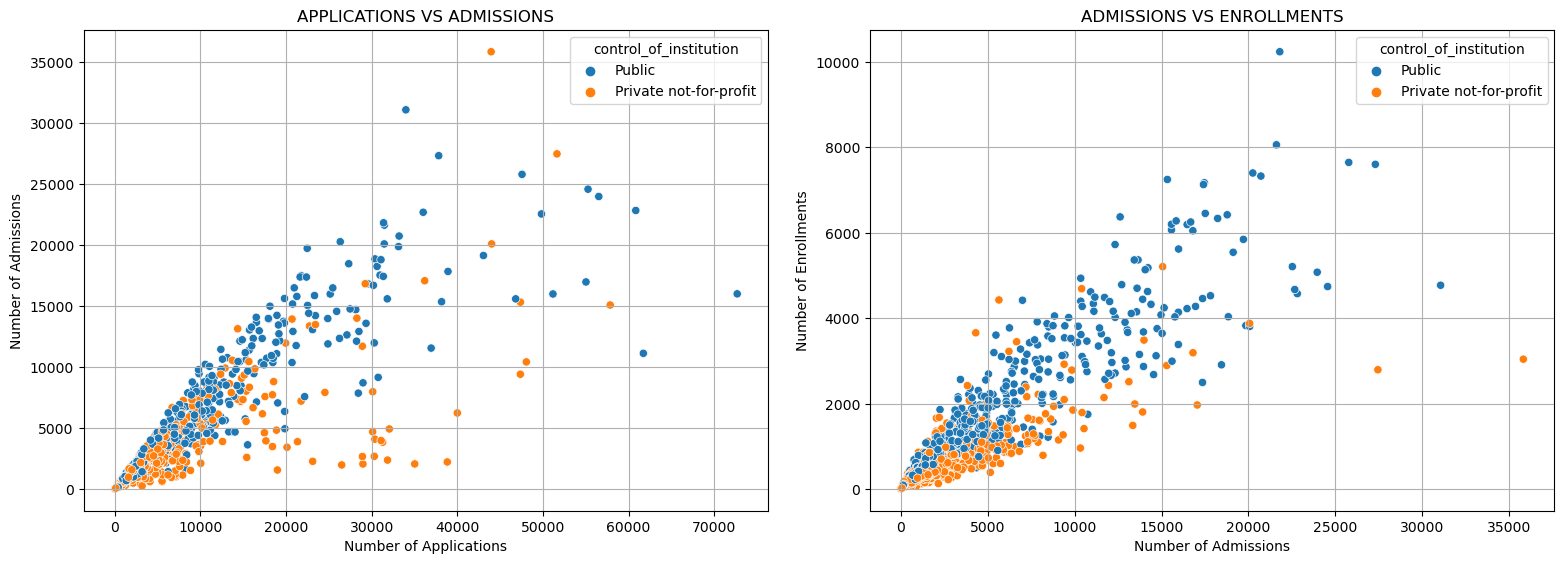

In [76]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('APPLICATIONS VS ADMISSIONS')
sns.scatterplot(y=df.admissions_total,x=df.applicants_total,hue=df.control_of_institution)
plt.ylabel('Number of Admissions')
plt.xlabel('Number of Applications')
plt.grid()

plt.subplot(1,2,2)
plt.title('ADMISSIONS VS ENROLLMENTS')
sns.scatterplot(x='admissions_total',y='enrolled_total',data=df,hue='control_of_institution')
plt.ylabel('Number of Enrollments')
plt.xlabel('Number of Admissions')
plt.grid()

plt.tight_layout(pad=2)

it could be more meaningful to work with a rate of admissions or acceptance and an enrollment rate.The acceptance rate will be based on the number of applications; whereas, the enrollment rate on the number of admissions.

In [77]:
df['acceptance_rate']=(df.admissions_total/df.applicants_total*100).round(2)
df['enrollment_rate']=(df.enrolled_total/df.admissions_total*100).round(2)
df.head(2)

,name,year,highest_degree_offered,offers_bachelors_degree,offers_masters_degree,offers_doctors_degree_research_scholarship,offers_doctors_degree_professional_practice,applicants_total,admissions_total,enrolled_total,...,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total,acceptance_rate,enrollment_rate
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0,89.89,20.00
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0,86.73,35.93


Text(0.5, 0, 'Number of Applications')

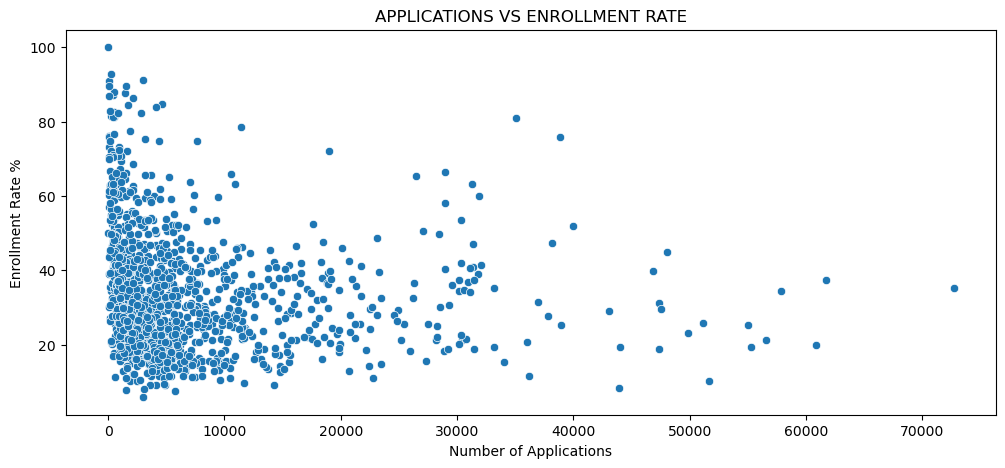

In [78]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='applicants_total',y='enrollment_rate',data=df)
plt.title('APPLICATIONS VS ENROLLMENT RATE')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Number of Applications')

Consequently, we can say that a high number of applications does not mean that a university is preferred among students.

Text(0.5, 0, 'Acceptance Rate %')

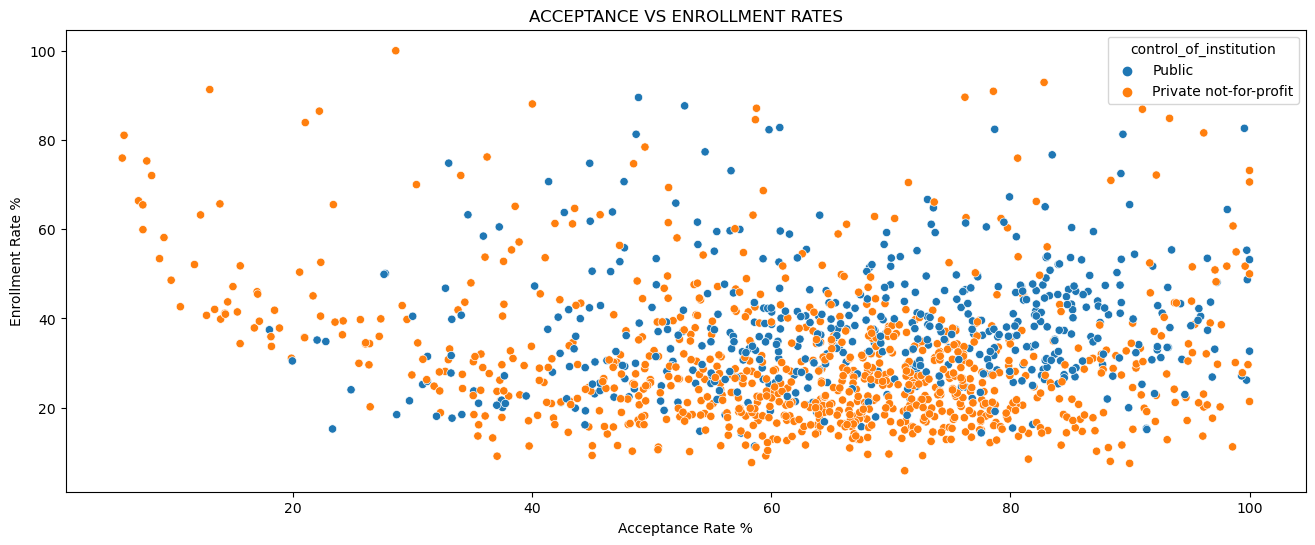

In [79]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='acceptance_rate',y='enrollment_rate',data=df,hue=df.control_of_institution)
plt.title('ACCEPTANCE VS ENROLLMENT RATES')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Acceptance Rate %')

students do not necessarily prefer a university because of its high acceptance rate or because it is easier for students to be admitted to a university.

## Q: Do students prefer public or private universities?

In [80]:
#spliting the number of applications according to the type of control: private or public.
private_uni = df[df['control_of_institution']=='Private not-for-profit']
private_uni = private_uni[private_uni['applicants_total'].notnull()]

public_uni = df[df['control_of_institution']=='Public']
public_uni = public_uni[public_uni['applicants_total'].notnull()]


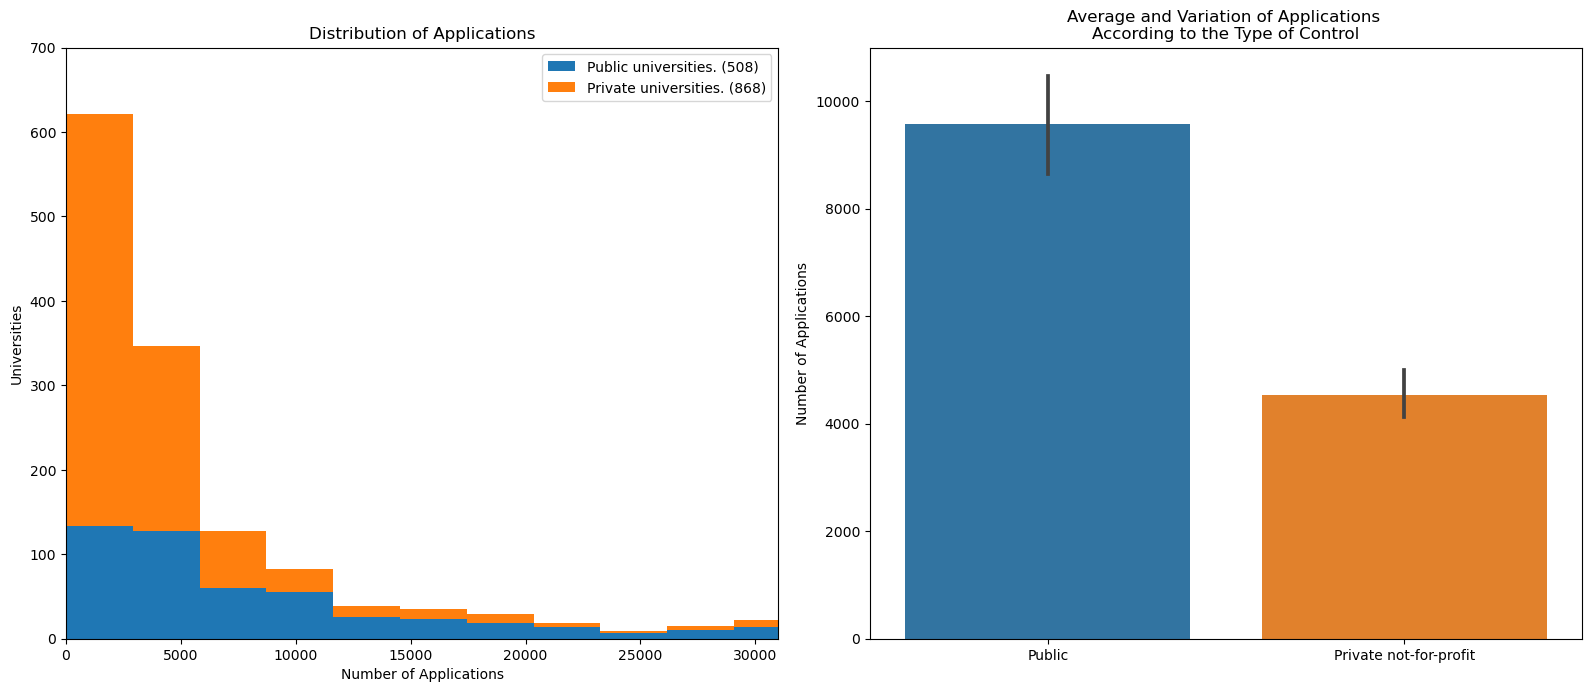

In [81]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
plt.hist([public_uni.applicants_total,private_uni.applicants_total],stacked=True,bins=25)
plt.axis([0,31000,0,700])
plt.title('Distribution of Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Universities')
plt.legend(['Public universities. ({})'.format(len(public_uni)),'Private universities. ({})'.format(len(private_uni))]);

plt.subplot(1,2,2)
sns.barplot(x=df.control_of_institution,y=df.applicants_total);
plt.title('''Average and Variation of Applications 
According to the Type of Control''')
plt.xlabel('')
plt.ylabel('Number of Applications');
plt.tight_layout(pad=1)

by using the enrollment rate as a reference of preference, the outcomes could be more meaningful

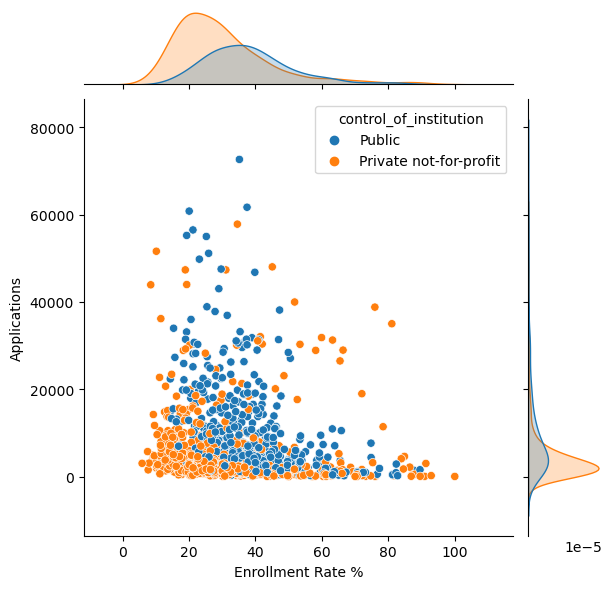

In [82]:
g=sns.jointplot(x=df.enrollment_rate,y=df.applicants_total,hue=df.control_of_institution,height=6);
g=(g.set_axis_labels("Enrollment Rate %","Applications"));

we can conclude that, in fact, there is a students' preference for public universities.

## Q: Do students prefer universities with low tuition and fees?

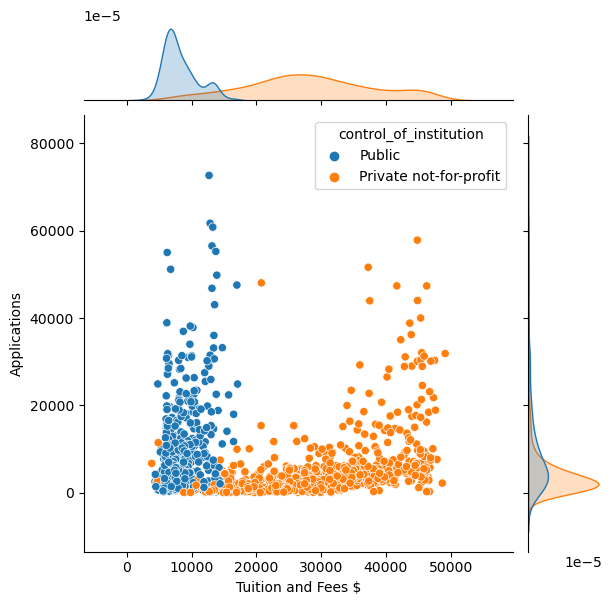

In [83]:
g=sns.jointplot(x=df.tuition_and_fees_2013_14,y=df.applicants_total,hue=df.control_of_institution,height=6);
g=(g.set_axis_labels("Tuition and Fees $","Applications"))

we could endeavor to find a definite conclusion by analyzing tuition and fees and enrollment rates

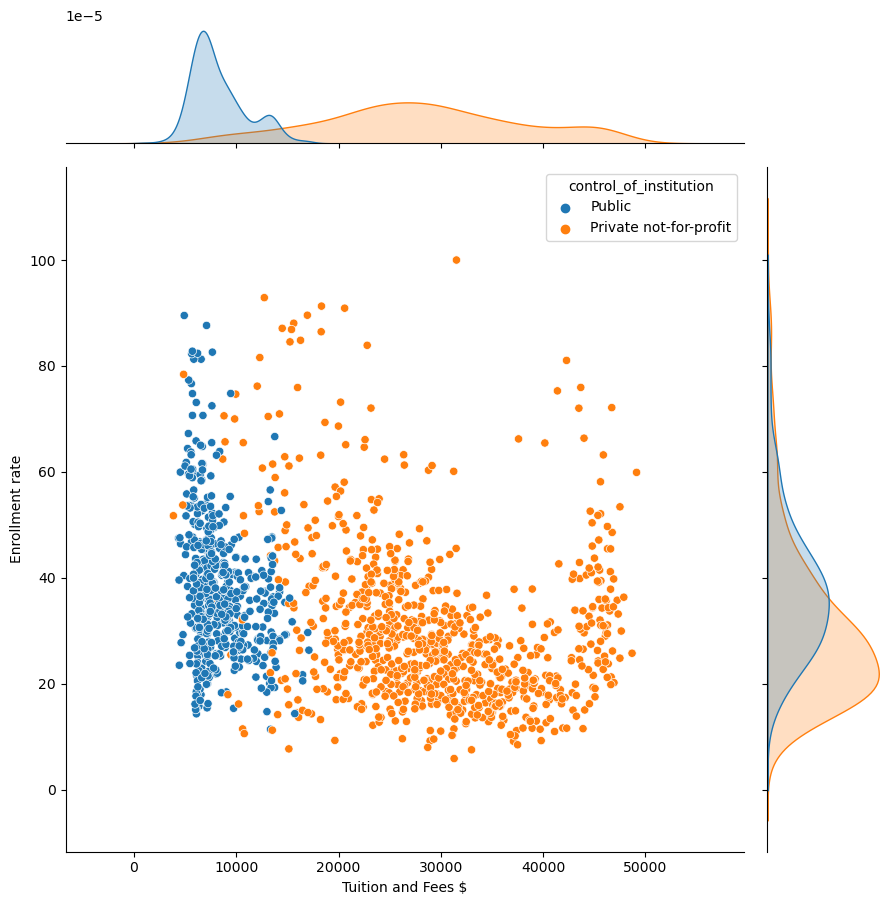

In [85]:
g=sns.jointplot(x=df.tuition_and_fees_2013_14,y=df.enrollment_rate,hue=df.control_of_institution,height=9);
g=(g.set_axis_labels('Tuition and Fees $','Enrollment rate'))

This leads us to think that, when it comes to tuition and fees, students prefer affordable universities.we found the reason or one of the reasons for the students' preference for public universities. Public universities are much more affordable than the majority of private universities.

## Q: Do students prefer a university for its low cost of on-campus living?

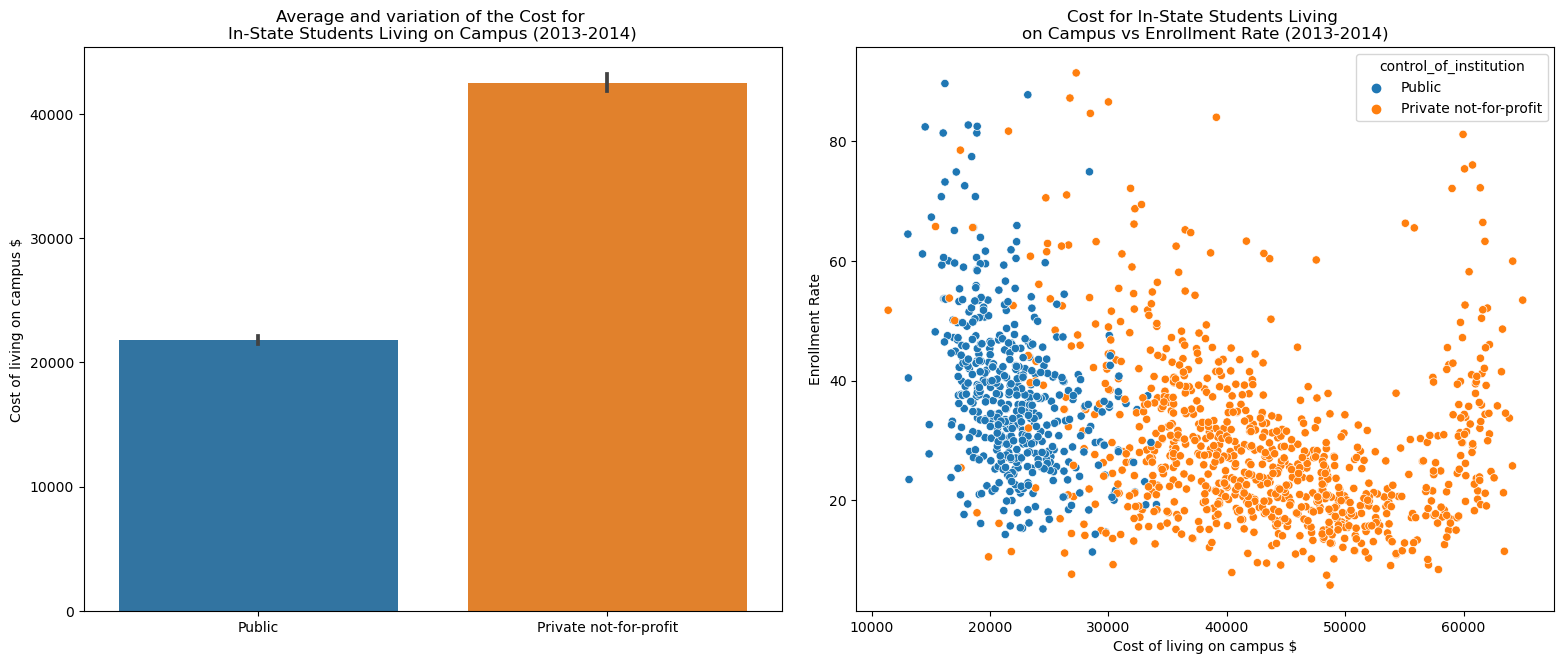

In [86]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.barplot(y=df.total_price_for_in_state_students_living_on_campus_2013_14,x=df.control_of_institution)
plt.title('''Average and variation of the Cost for 
In-State Students Living on Campus (2013-2014)''')        
plt.xlabel('')
plt.ylabel('Cost of living on campus $')


plt.subplot(1,2,2)
sns.scatterplot(x=df.total_price_for_in_state_students_living_on_campus_2013_14,y=df.enrollment_rate,hue=df.control_of_institution);
plt.title('''Cost for In-State Students Living 
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')


plt.tight_layout(pad=2)

 students, indeed, look for universities that offer an affordable cost of living on campus for in-state students.

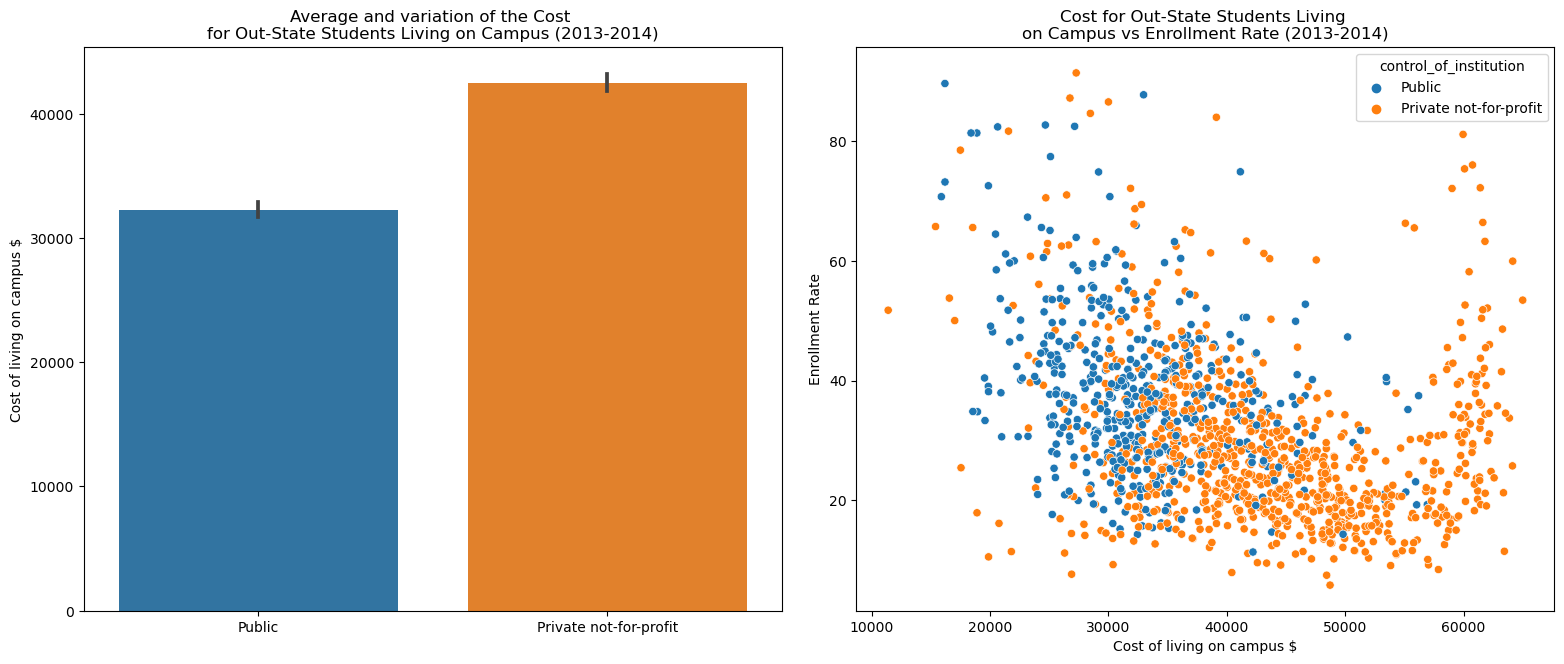

In [87]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.barplot(y=df.total_price_for_out_of_state_students_living_on_campus_2013_14,x=df.control_of_institution)
plt.title('''Average and variation of the Cost 
for Out-State Students Living on Campus (2013-2014)''')        
plt.xlabel('')
plt.ylabel('Cost of living on campus $')

plt.subplot(1,2,2)
sns.scatterplot(x=df.total_price_for_out_of_state_students_living_on_campus_2013_14,y=df.enrollment_rate,hue=df.control_of_institution);
plt.title('''Cost for Out-State Students Living 
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')
plt.tight_layout(pad=2)

students prefer universities that offer an affordable cost of living on campus for out-state students.